# Импортируем необходимые библиотеки


In [2]:

import requests
import numpy as np 
import pandas as pd

#импортируем библиотеку datetime для работы с датами 
import datetime as dt
from datetime import datetime, date

#Задаем некоторые опции библиотеки pandas, которые настраивают вывод 
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', None)

#импортируем библиотеки matplotlib и seaborn для построения графиков
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


# Скачиваем данные кусками


In [ ]:
offset_ = 1
limit_ = 100
urls = []
objids = []

for i in range(0,11000,100):
    urls.append(f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/kn/object?offset={i}&limit={limit_}&sortField=devId.devShortCleanNm&sortType=asc&objStatus=0')
for i in urls:
    object_data = requests.get(i).json().get('data').get('list')
    for k in object_data:
        objids.append(k.get('objId'))

NameError: ignored

In [ ]:
len(objids)

# Собираем список из информации, извлеченной из ссылки с id объектов, полученных ранее

In [ ]:
list = []
for i in objids:
    list.append(requests.get(f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/object/{i}').json().get('data'))

# Формируем DataFrame

In [ ]:
df = pd.DataFrame(list)
df

# Скачиваем ранее полученный и загруженный csv файл на гитхаб DataFrame

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/Triwka/python_homework/main/nashdom.csv')

# Формируем словарь, чтобы заменить числовые регионы в DataFrame на текстовые(спасибо Максим)

In [9]:
regions = requests.get('https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/dictionary/regions').json()
regions_dict = dict((region['id'], region['name']) for region in regions)

# Перезаписываем DataFrame, в котором числовой код региона заменен на текстовый,удаляем ненужные столбцы, образовавшиеся в результате конвертации excel файла в csv

In [10]:
df = df.replace({'region': regions_dict})
del df ['Unnamed: 0']
del df ['Unnamed: 0.1']
df

,id,pdId,developer,region,address,objElemLivingCnt,objReady100PercDt,wallMaterialShortDesc,objLkFinishTypeDesc,objLkFreePlanDesc,objElemParkingCnt,objSquareLiving,rpdNum,rpdPdfLink,rpdIssueDttm,objLkLatitude,objLkLongitude,objCompensFundFlg,objProblemFlg,objLkClassDesc,loadDttm,photoRenderDTO,objGuarantyEscrowFlg,objectType,residentialBuildings,newBuildingId,objFlatCnt,objFlatSq,objNonlivElemCnt,objStatus,isAvailableWantLiveHere,objInfrstrBicycleLaneFlg,objInfrstrRampFlg,objInfrstrCurbLoweringFlg,objElevatorCargoPassengerCnt,objectTransportInfo,conclusion,objGreenHouseFlg,objEnergyEffShortDesc,infrastructureIndexValue,floorMin,floorMax,miniUrl,objFloorCnt,quartography,objTransferPlanDt,objLivCeilingHeight,objInfrstrPlaygrndCnt,objInfrstrSportGroundCnt,objInfrstrTrashAreaCnt,objInfrstrObjPrkngCnt,objInfrstrNotObjPrkngCnt,objElevatorWheelchairCnt,objElevatorPassengerCnt,objElevatorCargoCnt,soldOutPerc,objPriceAvg,generalContractorNm,nonlivFirstFloor,objLkSaleDepEmail,transportDistIndex,transportDistIndexValue,nameObj,greenAreaIndexValue,airQualityIndexValue,complexShortNm,metro
0,29679,124647,"{'devId': 7424, 'devShortCleanNm': '212-2', 'd...",Ростовская область,г Таганрог,18,2020-03-31,Другое,Под ключ,Есть,0,1519.00,61-000818,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,20-03-2019 18:41,47.2238,38.8513,0,0,Комфорт,27-09-2022 01:26,[],0,normal,1,40800,18,1519.00,0,0,True,0,0,0,0,[],False,0,Не нормируется,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13383,28105,"{'devId': 306, 'devShortCleanNm': '2МЕН ГРУПП'...",Тюменская область,г Тюмень,68,2022-12-31,Другое,По желанию заказчика,Есть,31,6293.78,72-000095,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,07-09-2022 15:16,57.1519,65.5536,1,0,Элитный,27-09-2022 01:26,"[{'objId': 13383, 'pdId': 28105, 'rpdId': 6269...",0,normal,1,39024,68,6293.78,10,0,True,0,1,1,7,[],False,0,B,10,4.0,20.0,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,20.0,"{'objLivElem1KCnt': 13, 'objLivElem2KCnt': 21,...",28-02-2023 12:00,"2,8",1.0,1.0,1.0,0.0,11.0,0.0,5.0,1.0,0.407164,53109.0,ООО Транспромжилстрой-2005 (ИНН: 7204097730),1.0,info@2mengroup.ru,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13397,28141,"{'devId': 306, 'devShortCleanNm': '2МЕН ГРУПП'...",Тюменская область,"г Тюмень, ул Профсоюзная, д. 56",65,2024-12-31,Другое,Без отделки,Нет,0,6248.51,72-000097,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,07-09-2022 15:20,57.1519,65.5544,0,0,Элитный,27-09-2022 01:26,"[{'objId': 13397, 'pdId': 28141, 'rpdId': 6328...",0,normal,1,37201,65,6248.51,70,0,True,0,1,1,9,[],False,0,B,10,6.0,12.0,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,12.0,"{'objLivElem1KCnt': 0, 'objLivElem2KCnt': 24, ...",28-02-2025 12:00,"2,96",1.0,1.0,1.0,11.0,10.0,0.0,5.0,4.0,0.999984,45523.0,ООО Транспромжилстрой-2005 (ИНН: 7204097730),0.0,info@2mengroup.ru,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,13398,28141,"{'devId': 306, 'devShortCleanNm': '2МЕН ГРУПП'...",Тюменская область,"г Тюмень, ул Профсоюзная, д. 56",43,2024-12-31,Другое,Без отделки,Нет,0,4812.98,72-000097,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,07-09-2022 15:20,57.1519,65.5544,0,0,Элитный,27-09-2022 01:26,"[{'objId': 13398, 'pdId': 28141, 'rpdId': 6328...",0,normal,1,37165,43,4812.98,48,0,True,0,1,1,6,[],False,0,B,10,7.0,10.0,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,10.0,"{'objLivElem1KCnt': 0, 'objLivElem2KCnt': 11, ...",28-02-2025 12:00,"2,96",1.0,1.0,1.0,4.0,15.0,0.0,3.0,3.0,1.000000,47886.0,ООО Транспромжилстрой-2005 (ИНН: 7204097730),0.0,info@2mengroup.ru,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13399,28141,"{'devId': 306, 'devShortCleanNm': '2МЕН ГРУПП'...",Тюменская область,"г Тюмень, ул Профсоюзная, д. 56",0,2024-12-31,Другое,Без отделки,Нет,125,0.00,72-000097,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,07-09-2022 15:20,57.1519,65.5544,0,0,Элитный,27-09-2022 01:26,"[{'objId': 13399, 'pdId': 28141, 'rpdId': 6328...",0,normal,0,34754,0,0.00,0,0,True,0,1,1,15,[],False,0,B,10,1.0,1.0,https://xn--

# Формируем датафрейм, состоящий из двух Series(region и objPriceAvg), группируем по регионам и высчитываем среднюю стоимость квадратного метра в каждом регионе

In [11]:
df2 = df.dropna(subset=['objPriceAvg']).groupby(['region'])['objPriceAvg'].mean().reset_index()
df2

,region,objPriceAvg
0,Алтайский край,69779.055556
1,Амурская область,116050.863636
2,Архангельская область,82845.894737
3,Астраханская область,78524.724138
4,Белгородская область,79627.577778
...,...,...
73,Челябинская область,57135.766667
74,Чеченская Республика,32742.333333
75,Чувашская Республика,64241.229508
76,Ямало-Ненецкий АО,92141.227273


In [12]:
var1=df2.sort_values(by=['objPriceAvg'],ascending=False)['region'].iloc[0]
var2=round(df2.sort_values(by=['objPriceAvg'],ascending=False)['objPriceAvg'].iloc[0], 3)
var3=df2.sort_values(by=['objPriceAvg'])['region'].iloc[0]
var4=round(df2.sort_values(by=['objPriceAvg'])['objPriceAvg'].iloc[0], 3)
var5=df2['objPriceAvg'].mean()

# Чертим график и проводим анализ по стоимости квадратного метра среди регионов

Самый дорогой регион - Город Москва, в котором средняя цена за квадратный метр составляет 315424.757 рублей
Самый дешевый-Республика Дагестан, в котором средняя цена за квадратный метр составляет 24695.909 рублей
Средняя цена за квадратный метр по России составляет 80922.06 рублей


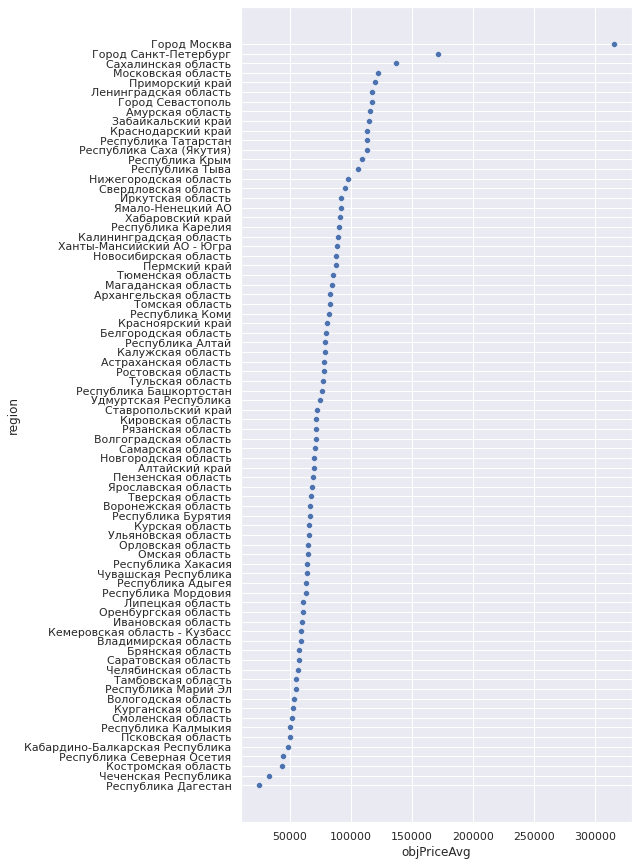

In [13]:
sns.set(rc = {'figure.figsize':(7,15)})
sns.scatterplot(y = 'region', x = 'objPriceAvg', data = df2.sort_values(by=['objPriceAvg'],ascending=False))
df2.sort_values(by=['objPriceAvg'],ascending=False)['region'].iloc[0]
print(f'Самый дорогой регион - {var1}, в котором средняя цена за квадратный метр составляет {var2} рублей')
print(f'Самый дешевый-{var3}, в котором средняя цена за квадратный метр составляет {var4} рублей')
print(f'Средняя цена за квадратный метр по России составляет {round(var5,2)} рублей')

# Заменяем в Series 'objReady100PercDt' Год-месяц-число на год

In [14]:
df['objReady100PercDt'] = pd.to_datetime(df['objReady100PercDt']).dt.year
df

,id,pdId,developer,region,address,objElemLivingCnt,objReady100PercDt,wallMaterialShortDesc,objLkFinishTypeDesc,objLkFreePlanDesc,objElemParkingCnt,objSquareLiving,rpdNum,rpdPdfLink,rpdIssueDttm,objLkLatitude,objLkLongitude,objCompensFundFlg,objProblemFlg,objLkClassDesc,loadDttm,photoRenderDTO,objGuarantyEscrowFlg,objectType,residentialBuildings,newBuildingId,objFlatCnt,objFlatSq,objNonlivElemCnt,objStatus,isAvailableWantLiveHere,objInfrstrBicycleLaneFlg,objInfrstrRampFlg,objInfrstrCurbLoweringFlg,objElevatorCargoPassengerCnt,objectTransportInfo,conclusion,objGreenHouseFlg,objEnergyEffShortDesc,infrastructureIndexValue,floorMin,floorMax,miniUrl,objFloorCnt,quartography,objTransferPlanDt,objLivCeilingHeight,objInfrstrPlaygrndCnt,objInfrstrSportGroundCnt,objInfrstrTrashAreaCnt,objInfrstrObjPrkngCnt,objInfrstrNotObjPrkngCnt,objElevatorWheelchairCnt,objElevatorPassengerCnt,objElevatorCargoCnt,soldOutPerc,objPriceAvg,generalContractorNm,nonlivFirstFloor,objLkSaleDepEmail,transportDistIndex,transportDistIndexValue,nameObj,greenAreaIndexValue,airQualityIndexValue,complexShortNm,metro
0,29679,124647,"{'devId': 7424, 'devShortCleanNm': '212-2', 'd...",Ростовская область,г Таганрог,18,2020,Другое,Под ключ,Есть,0,1519.00,61-000818,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,20-03-2019 18:41,47.2238,38.8513,0,0,Комфорт,27-09-2022 01:26,[],0,normal,1,40800,18,1519.00,0,0,True,0,0,0,0,[],False,0,Не нормируется,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13383,28105,"{'devId': 306, 'devShortCleanNm': '2МЕН ГРУПП'...",Тюменская область,г Тюмень,68,2022,Другое,По желанию заказчика,Есть,31,6293.78,72-000095,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,07-09-2022 15:16,57.1519,65.5536,1,0,Элитный,27-09-2022 01:26,"[{'objId': 13383, 'pdId': 28105, 'rpdId': 6269...",0,normal,1,39024,68,6293.78,10,0,True,0,1,1,7,[],False,0,B,10,4.0,20.0,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,20.0,"{'objLivElem1KCnt': 13, 'objLivElem2KCnt': 21,...",28-02-2023 12:00,"2,8",1.0,1.0,1.0,0.0,11.0,0.0,5.0,1.0,0.407164,53109.0,ООО Транспромжилстрой-2005 (ИНН: 7204097730),1.0,info@2mengroup.ru,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13397,28141,"{'devId': 306, 'devShortCleanNm': '2МЕН ГРУПП'...",Тюменская область,"г Тюмень, ул Профсоюзная, д. 56",65,2024,Другое,Без отделки,Нет,0,6248.51,72-000097,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,07-09-2022 15:20,57.1519,65.5544,0,0,Элитный,27-09-2022 01:26,"[{'objId': 13397, 'pdId': 28141, 'rpdId': 6328...",0,normal,1,37201,65,6248.51,70,0,True,0,1,1,9,[],False,0,B,10,6.0,12.0,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,12.0,"{'objLivElem1KCnt': 0, 'objLivElem2KCnt': 24, ...",28-02-2025 12:00,"2,96",1.0,1.0,1.0,11.0,10.0,0.0,5.0,4.0,0.999984,45523.0,ООО Транспромжилстрой-2005 (ИНН: 7204097730),0.0,info@2mengroup.ru,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,13398,28141,"{'devId': 306, 'devShortCleanNm': '2МЕН ГРУПП'...",Тюменская область,"г Тюмень, ул Профсоюзная, д. 56",43,2024,Другое,Без отделки,Нет,0,4812.98,72-000097,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,07-09-2022 15:20,57.1519,65.5544,0,0,Элитный,27-09-2022 01:26,"[{'objId': 13398, 'pdId': 28141, 'rpdId': 6328...",0,normal,1,37165,43,4812.98,48,0,True,0,1,1,6,[],False,0,B,10,7.0,10.0,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,10.0,"{'objLivElem1KCnt': 0, 'objLivElem2KCnt': 11, ...",28-02-2025 12:00,"2,96",1.0,1.0,1.0,4.0,15.0,0.0,3.0,3.0,1.000000,47886.0,ООО Транспромжилстрой-2005 (ИНН: 7204097730),0.0,info@2mengroup.ru,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13399,28141,"{'devId': 306, 'devShortCleanNm': '2МЕН ГРУПП'...",Тюменская область,"г Тюмень, ул Профсоюзная, д. 56",0,2024,Другое,Без отделки,Нет,125,0.00,72-000097,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,07-09-2022 15:20,57.1519,65.5544,0,0,Элитный,27-09-2022 01:26,"[{'objId': 13399, 'pdId': 28141, 'rpdId': 6328...",0,normal,0,34754,0,0.00,0,0,True,0,1,1,15,[],False,0,B,10,1.0,1.0,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/

## Строим два графика:
##1)Регион/год ввода жилья
##2)Регион/кол-во вводимого жилья

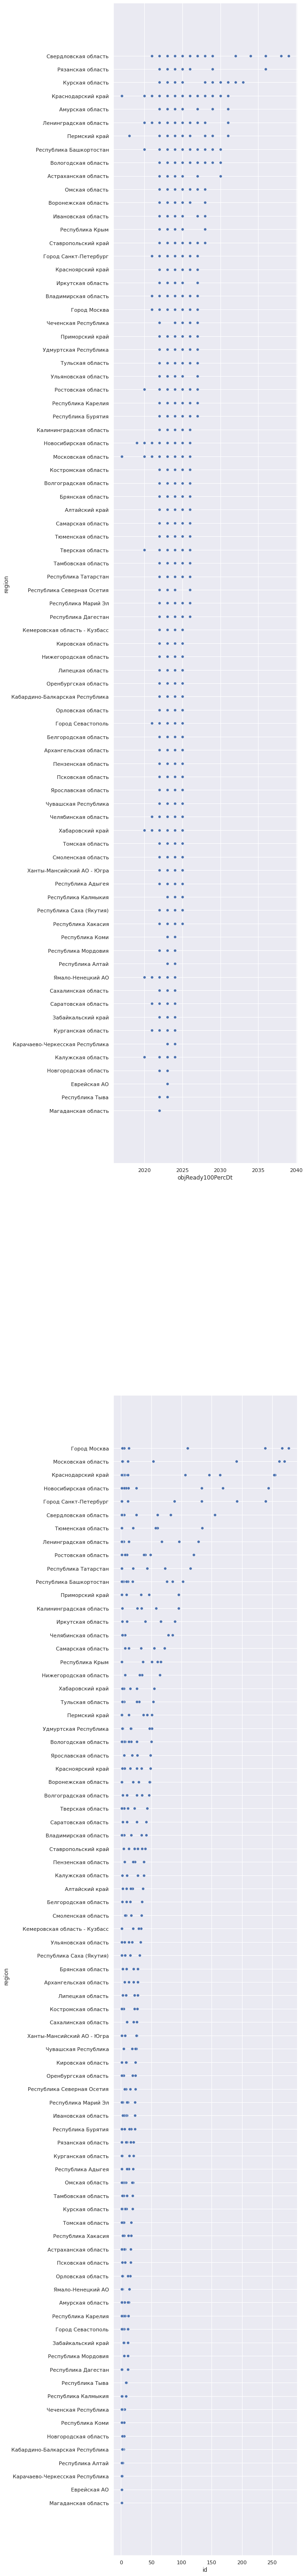

In [16]:
sns.set(rc = {'figure.figsize':(7,100)})
df3 = df.groupby(['objReady100PercDt','region']).count().reset_index()
fig, ay = plt.subplots(nrows=2)
sns.scatterplot(y = 'region', x = 'objReady100PercDt', data = df3.sort_values(by=['objReady100PercDt'],ascending=False),ax = ay[0])
sns.scatterplot(y = 'region', x = 'id', data = df3.sort_values(by=['id'],ascending=False),ax = ay[1])

## Больше всего вводимого жилья находится в Москве и Московской области, меньше всего в Магаданской области. Самые долгострящиеся объекты находится в Свердловской области

In [ ]:
mean_year = df3['objReady100PercDt'].mean()
print(f'Год, в котором будет введено в экслуатацию наибольшее количество жилья - {round(mean_year)}')

Год, в котором будет введено в экслуатацию наибольшее количество жилья - 2024


## Анализ количества парковочных мест

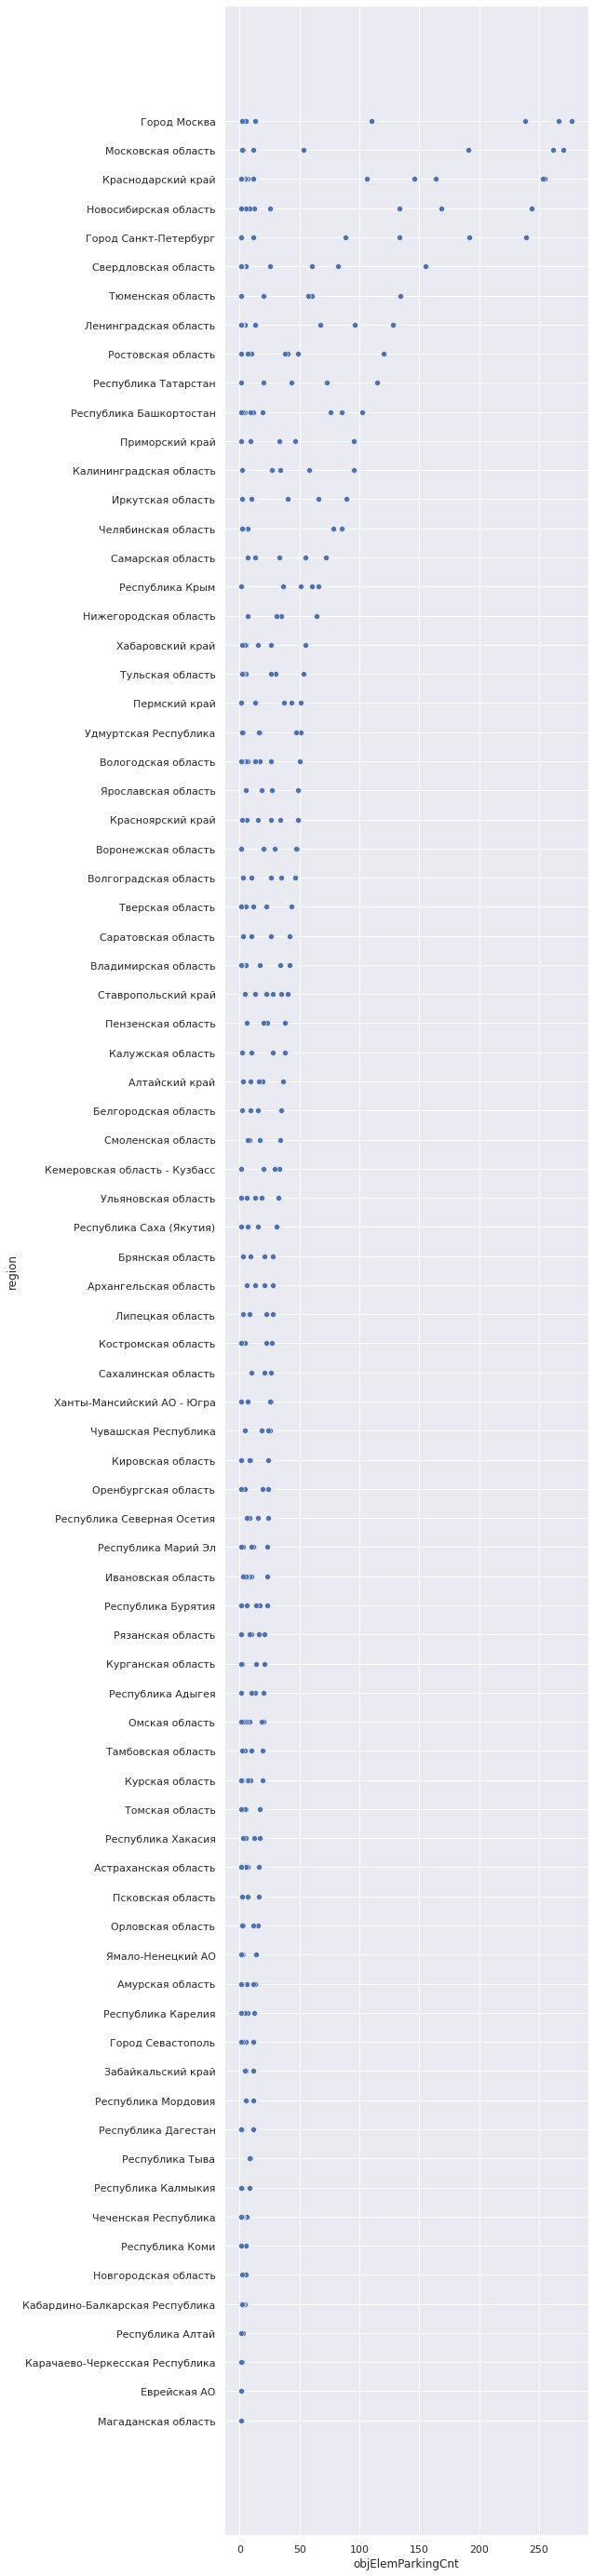

In [18]:
sns.set(rc = {'figure.figsize':(7,50)})
sns.scatterplot(y = 'region', x = 'objElemParkingCnt', data = df3.sort_values(by=['objElemParkingCnt'],ascending=False))

In [22]:
parks_mean = round(df3['objElemParkingCnt'].mean())
print(f'Больше всего парковок на дом - Москва, меньше всего - Магаданская область, в среднем количество парковок на дом - {parks_mean}')

Больше всего парковок на дом - Москва, меньше всего - Магаданская область, в среднем количество парковок на дом - 26


Анализ жилой площади

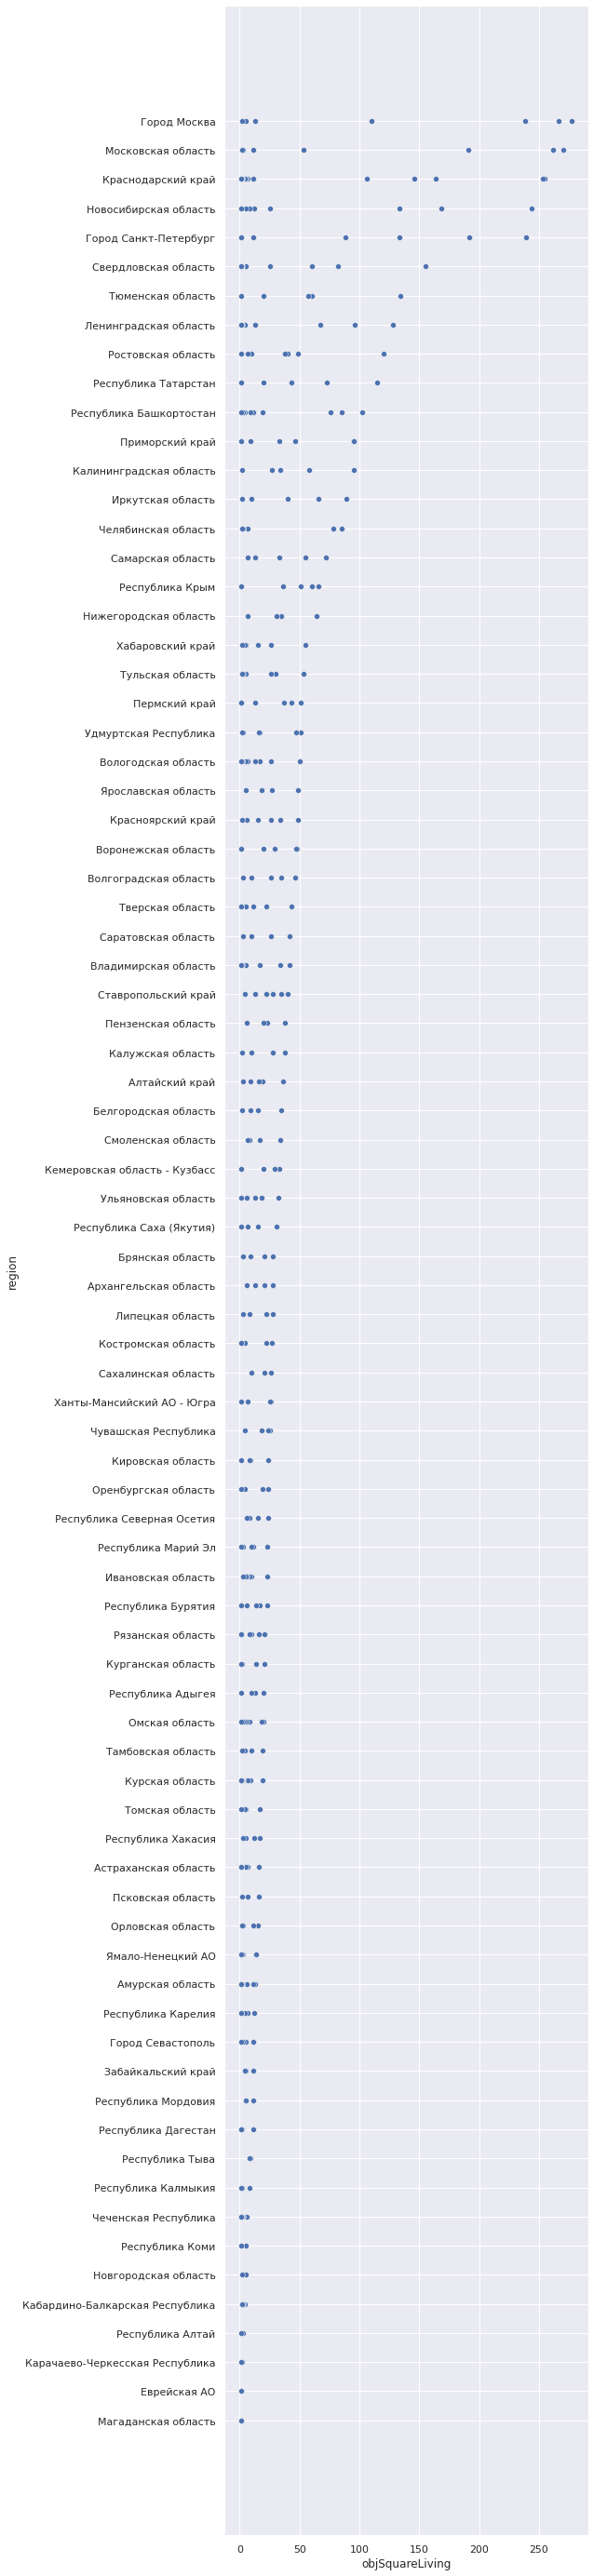

In [23]:
sns.set(rc = {'figure.figsize':(7,50)})
sns.scatterplot(y = 'region', x = 'objSquareLiving', data = df3.sort_values(by=['objSquareLiving'],ascending=False))

In [34]:
sq_liv_mean = round(df['objSquareLiving'].mean())
print(f'Регион с наибольшей жилой площадью - Москва, с наименьшей - Магаданская область, средняя жилая площадь по России - {sq_liv_mean} квадратных метров')

Регион с наибольшей жилой площадью - Москва, с наименьшей - Магаданская область, средняя жилая площадь по России - 9448 квадратных метров


## Анализ количества квартир

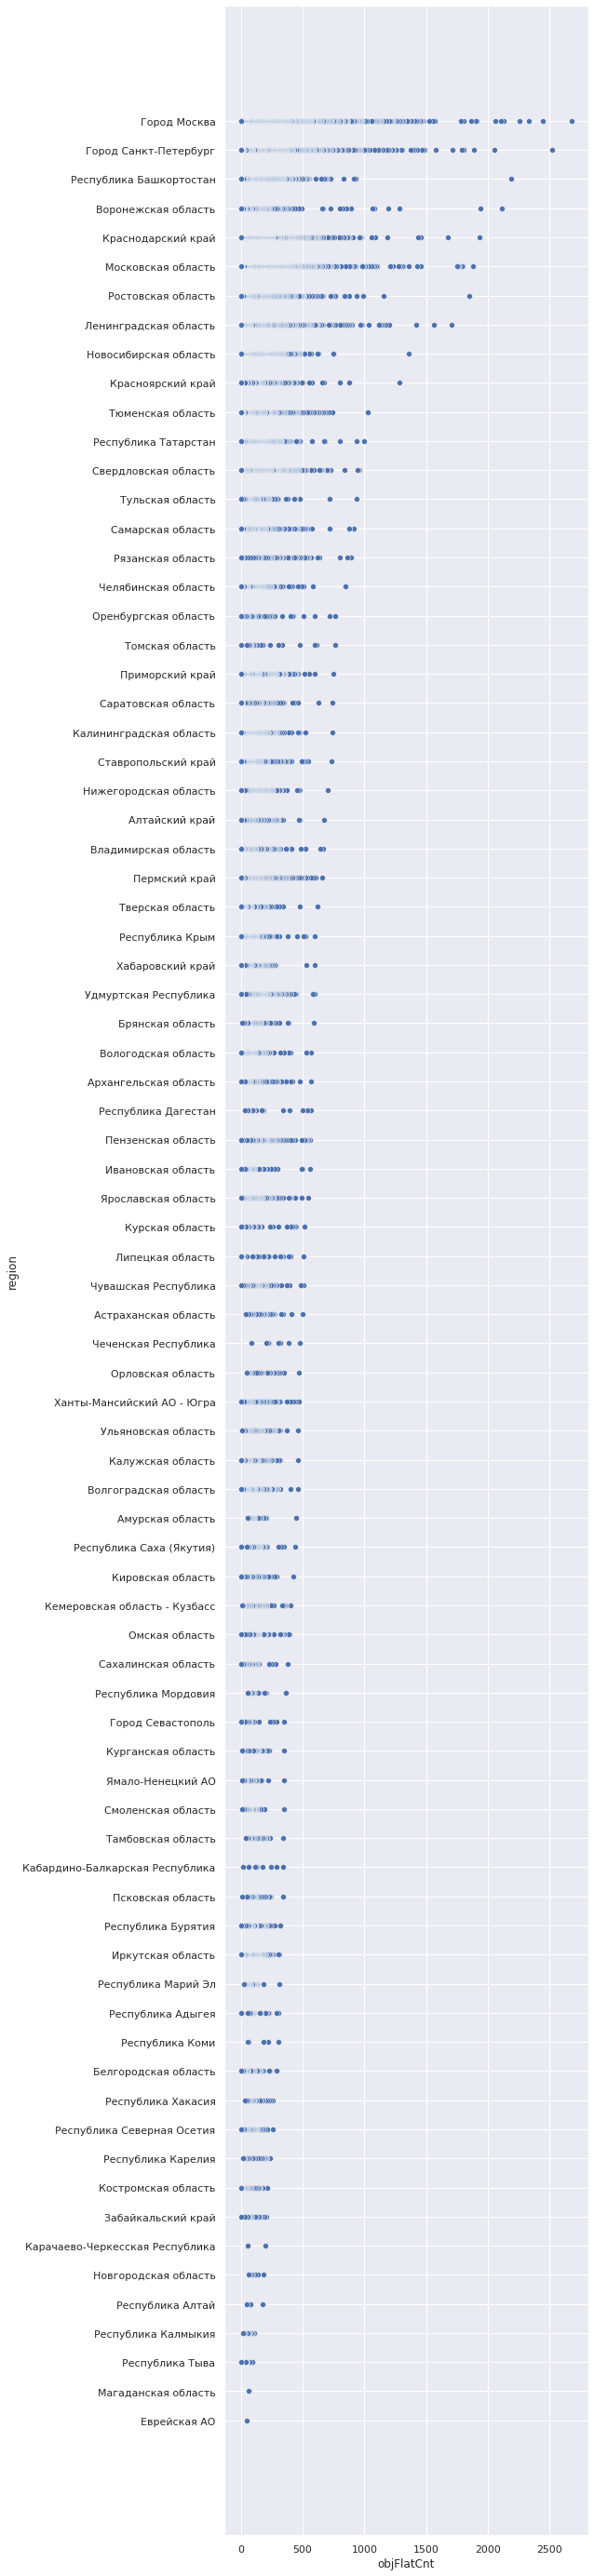

In [44]:
sns.set(rc = {'figure.figsize':(7,50)})
sns.scatterplot(y = 'region', x = 'objFlatCnt', data = df.sort_values(by=['objFlatCnt'],ascending=False))

In [47]:
flat_cnt = round(df['objFlatCnt'].mean())
print(f'Регион с наибольшим количеством квартир - Москва, с наименьшим - Еврейская АО, среднее количество квартир по России - {flat_cnt} шт.')

Регион с наибольшим количеством квартир - Москва, с наименьшим - Еврейская АО, среднее количество квартир по России - 191 шт.


## Анализ этажности

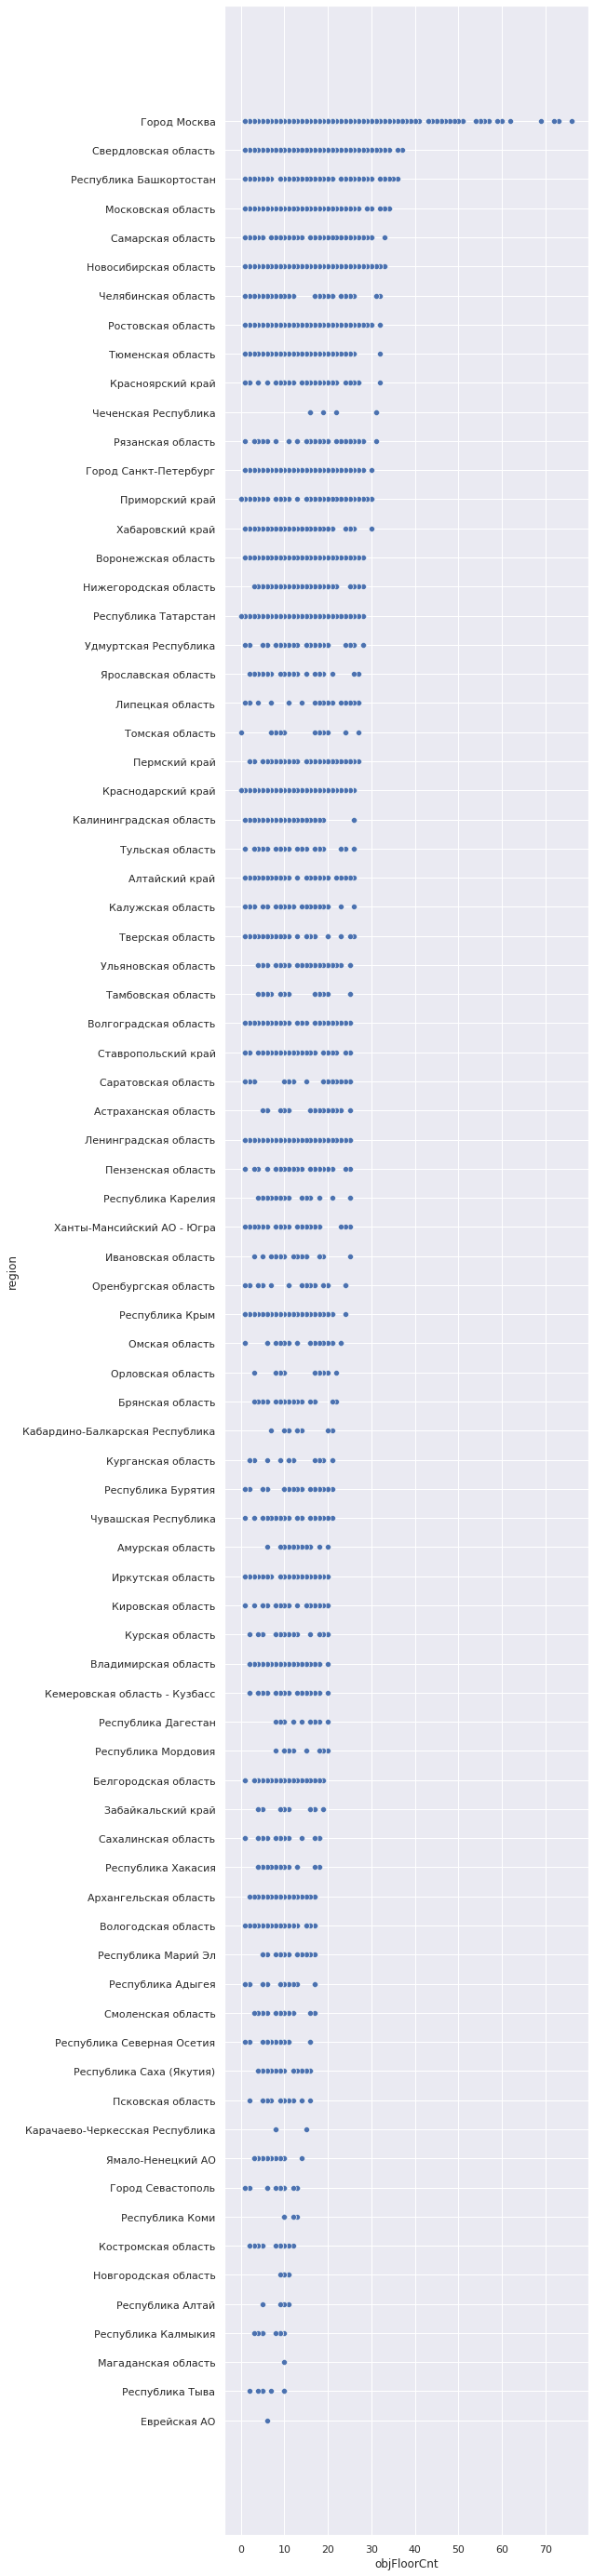

In [52]:

sns.set(rc = {'figure.figsize':(7,50)})
sns.scatterplot(y = 'region', x = 'objFloorCnt', data = df.dropna(subset=['objFloorCnt']).sort_values(by=['objFloorCnt'],ascending=False))

In [58]:
floor_cnt = round(df['objFloorCnt'].mean())
floor_lowest_region = df.dropna(subset=['objFloorCnt']).sort_values(by=['objFloorCnt'])['region'].iloc[0]
print(f'Регион с наибольшей этажностью домов - Москва, регион с самыми малоэтажными зданиями - {floor_lowest_region}, средняя этажность по России - {floor_cnt} этажей.')

Регион с наибольшей этажностью домов - Москва, регион с самыми малоэтажными зданиями - Томская область, средняя этажность по России - 12 этажей.
